In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
purchase = pd.read_csv('QVI_purchase_behaviour.csv')
transaction = pd.read_csv('QVI_transaction_data.csv')

In [3]:
#from task 1
transaction['DATE'] = pd.to_datetime(transaction['DATE'],origin='1899-12-30', unit='D')
transaction = transaction.drop([69762,69763])
transaction['PROD_NAME'] = transaction['PROD_NAME'].replace(
    'Twisties Chicken270g', 
    'Twisties Chicken 270g')
transaction['PROD_NAME'] = transaction['PROD_NAME'].replace(
    'Natural Chip        Compny SeaSalt175g', 
    'Natural Chip        Compny SeaSalt 175g')
transaction['PROD_NAME'] = transaction['PROD_NAME'].replace(
    'Natural ChipCo      Hony Soy Chckn175g', 
    'Natural ChipCo      Hony Soy Chckn 175g')
transaction['PROD_NAME'] = transaction['PROD_NAME'].replace(
    'Old El Paso Salsa   Dip Chnky Tom Ht300g', 
    'Old El Paso Salsa   Dip Chnky Tom Ht 300g')
transaction['PROD_NAME'] = transaction['PROD_NAME'].replace(
    'Smiths Crinkle Cut  Chips Chs&Onion170g', 
    'Smiths Crinkle Cut  Chips Chs&Onion 170g')
transaction['PROD_NAME'] = transaction['PROD_NAME'].replace(
    'Smiths Thinly       Swt Chli&S/Cream175G', 
    'Smiths Thinly       Swt Chli&S/Cream 175g')
transaction['PROD_NAME'] = transaction['PROD_NAME'].replace(
    'Smiths Chip Thinly  CutSalt/Vinegr175g', 
    'Smiths Chip Thinly  CutSalt/Vinegr 175g')
transaction['PROD_NAME'] = transaction['PROD_NAME'].replace(
    'Kettle 135g Swt Pot Sea Salt', 
    'Kettle Swt Pot Sea Salt 135g')
transaction['Weight'] = transaction['PROD_NAME'].apply(lambda x: x.split()[-1])
transaction['Brand'] = transaction['PROD_NAME'].apply(lambda x: x.split()[0])
transaction['Weight'] = transaction['Weight'].replace(
    '210G', 
    '210g')
transaction['Weight'] = transaction['Weight'].replace(
    '150G', 
    '150g')
transaction['Brand'] = transaction['Brand'].replace(
    'NCC', 
    'Natural')
transaction['Brand'] = transaction['Brand'].replace(
    'RRD', 
    'Red')
transaction['Brand'] = transaction['Brand'].replace(
    'Snbts', 
    'Sunbites')
transaction['Brand'] = transaction['Brand'].replace(
    'Infzns', 
    'Infuzions')
transaction['Brand'] = transaction['Brand'].replace(
    'Grain', 
    'GrnWves')
transaction['Brand'] = transaction['Brand'].replace(
    'WW', 
    'Woolworths')
transaction['Brand'] = transaction['Brand'].replace(
    'Dorito', 
    'Doritos')

In [4]:
transaction.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'Weight', 'Brand'],
      dtype='object')

In [5]:
transaction = transaction.sort_values(by = 'DATE')
transaction['Month'] = transaction['DATE'].dt.to_period('M').astype(str)

<h1><center>Experimentation and uplift testing</center></h1>

<h3 style="color: darkorange;">  1. Tasks:</h3>

- Choose controls store for the trial period (2019-02-01 to 2019-04-30)

- Evaluate the trial stores (77,86 and 88) performance

- Identify the driver of changes (if applicable)

<h3 style="color: darkorange;">  2. Choosing the control stores:</h3>

Metrics

- total sales revenue
- total number of customers

In [6]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight,Brand,Month
205333,2018-07-01,24,24109,20881,54,CCs Original 175g,2,4.2,175g,CCs,2018-07
202059,2018-07-01,236,236023,238660,100,Smiths Crinkle Cut Chips Chs&Onion 170g,2,5.8,170g,Smiths,2018-07
102495,2018-07-01,45,45100,40977,47,Doritos Corn Chips Original 170g,2,8.8,170g,Doritos,2018-07
217968,2018-07-01,21,21284,17968,59,Old El Paso Salsa Dip Tomato Med 300g,2,10.2,300g,Old,2018-07
149892,2018-07-01,262,262188,262373,114,Kettle Sensations Siracha Lime 150g,2,9.2,150g,Kettle,2018-07


In [7]:
#split the data into before trial period to choose the control store and trial period for performance analysis

before = transaction[transaction['DATE'] < '2019-02-01'].copy()
trial = transaction[(transaction['DATE'] >= '2019-02-01') & (transaction['DATE'] <= '2019-04-30')].copy()
trial

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight,Brand,Month
146284,2019-02-01,199,199296,198890,71,Twisties Cheese Burger 250g,2,8.6,250g,Twisties,2019-02
185727,2019-02-01,4,4160,3381,109,Pringles Barbeque 134g,2,7.4,134g,Pringles,2019-02
3526,2019-02-01,185,185456,188360,75,Cobs Popd Sea Salt Chips 110g,1,3.8,110g,Cobs,2019-02
174461,2019-02-01,50,50377,46523,107,Smiths Crinkle Cut French OnionDip 150g,2,5.2,150g,Smiths,2019-02
113747,2019-02-01,216,216014,214738,14,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.8,380g,Smiths,2019-02
...,...,...,...,...,...,...,...,...,...,...,...
71507,2019-04-30,45,45227,41685,26,Pringles Sweet&Spcy BBQ 134g,2,7.4,134g,Pringles,2019-04
194889,2019-04-30,133,133197,137306,91,CCs Tasty Cheese 175g,2,4.2,175g,CCs,2019-04
65396,2019-04-30,183,183232,186199,24,Grain Waves Sweet Chilli 210g,2,7.2,210g,GrnWves,2019-04
70073,2019-04-30,7,7282,7443,32,Kettle Sea Salt And Vinegar 175g,2,10.8,175g,Kettle,2019-04


In [8]:
before

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight,Brand,Month
205333,2018-07-01,24,24109,20881,54,CCs Original 175g,2,4.2,175g,CCs,2018-07
202059,2018-07-01,236,236023,238660,100,Smiths Crinkle Cut Chips Chs&Onion 170g,2,5.8,170g,Smiths,2018-07
102495,2018-07-01,45,45100,40977,47,Doritos Corn Chips Original 170g,2,8.8,170g,Doritos,2018-07
217968,2018-07-01,21,21284,17968,59,Old El Paso Salsa Dip Tomato Med 300g,2,10.2,300g,Old,2018-07
149892,2018-07-01,262,262188,262373,114,Kettle Sensations Siracha Lime 150g,2,9.2,150g,Kettle,2018-07
...,...,...,...,...,...,...,...,...,...,...,...
106162,2019-01-31,94,94006,92473,109,Pringles Barbeque 134g,2,7.4,134g,Pringles,2019-01
66822,2019-01-31,217,217013,216351,109,Pringles Barbeque 134g,2,7.4,134g,Pringles,2019-01
249191,2019-01-31,144,144059,144215,103,RRD Steak & Chimuchurri 150g,2,5.4,150g,Red,2019-01
153810,2019-01-31,39,39059,34981,13,Red Rock Deli Thai Chilli&Lime 150g,2,5.4,150g,Red,2019-01


In [9]:
before['Month'].nunique()

7

There are 7 months before the trial period

In [10]:
#building the metrics- monthly revenue
pretrial = before.groupby(['STORE_NBR','Month'])['TOT_SALES'].sum().reset_index()
pretrial.sort_values(by = ['STORE_NBR','Month'])
pretrial.shape

(1848, 3)

In [11]:
check = []
exclude = []
for i in range(pretrial['STORE_NBR'].nunique()):
    a = pretrial[pretrial['STORE_NBR']== i+1].count()[1]
    check.append(a)
for i in range(pretrial['STORE_NBR'].nunique()):
    if check[i]<7:
        exclude.append(i+1)
        print("Store",i+1, "can't be a control.")

Store 11 can't be a control.
Store 31 can't be a control.
Store 44 can't be a control.
Store 76 can't be a control.
Store 85 can't be a control.
Store 92 can't be a control.
Store 117 can't be a control.
Store 193 can't be a control.
Store 206 can't be a control.
Store 211 can't be a control.
Store 218 can't be a control.
Store 252 can't be a control.


12 stores don't have sales every months therefore they will be removed (after building the metrics).

In [12]:
#building the metrics- monthly number of customers
Customer = before.groupby(['STORE_NBR','Month'])['LYLTY_CARD_NBR'].nunique().reset_index()
Customer

,STORE_NBR,Month,LYLTY_CARD_NBR
0,1,2018-07,49
1,1,2018-08,42
2,1,2018-09,59
3,1,2018-10,44
4,1,2018-11,46
...,...,...,...
1843,272,2018-09,32
1844,272,2018-10,44
1845,272,2018-11,41
1846,272,2018-12,47


In [13]:
pretrial['Monthly_Cust'] = Customer['LYLTY_CARD_NBR']
pretrial

,STORE_NBR,Month,TOT_SALES,Monthly_Cust
0,1,2018-07,206.9,49
1,1,2018-08,176.1,42
2,1,2018-09,278.8,59
3,1,2018-10,188.1,44
4,1,2018-11,192.6,46
...,...,...,...,...
1843,272,2018-09,304.7,32
1844,272,2018-10,430.6,44
1845,272,2018-11,376.2,41
1846,272,2018-12,403.9,47


In [14]:
#building the metrics- average transactions per customers
trans = before.groupby(['STORE_NBR','Month'])['LYLTY_CARD_NBR'].value_counts()
Avg_Trans = trans.groupby(['STORE_NBR','Month']).mean().reset_index()
Avg_Trans

,STORE_NBR,Month,count
0,1,2018-07,1.061224
1,1,2018-08,1.023810
2,1,2018-09,1.050847
3,1,2018-10,1.022727
4,1,2018-11,1.021739
...,...,...,...
1843,272,2018-09,1.125000
1844,272,2018-10,1.159091
1845,272,2018-11,1.097561
1846,272,2018-12,1.000000


In [15]:
pretrial['Avg_Trans'] = Avg_Trans['count']

In [16]:
#remove the stores mentioned above
pretrial = pretrial[~pretrial['STORE_NBR'].isin(exclude)]
pretrial

,STORE_NBR,Month,TOT_SALES,Monthly_Cust,Avg_Trans
0,1,2018-07,206.9,49,1.061224
1,1,2018-08,176.1,42,1.023810
2,1,2018-09,278.8,59,1.050847
3,1,2018-10,188.1,44,1.022727
4,1,2018-11,192.6,46,1.021739
...,...,...,...,...,...
1843,272,2018-09,304.7,32,1.125000
1844,272,2018-10,430.6,44,1.159091
1845,272,2018-11,376.2,41,1.097561
1846,272,2018-12,403.9,47,1.000000


---

Need to build a scoring system to choose a control store for each trial store. My approach: calculate the magnitude distance (1- (Observed distance – minimum distance)/(Maximum distance – minimum distance)) for each metric and sum them (with equal weighting) then calculate the correlation for each metric and sum them (with equal weighting). I will provide a scoring system by assigning equal weighting to the magnitude distrance and correlation to find the top control stores. Finally, I will inspect each metric of the top control stores with the trial stores to choose the final control stores.

---

In [17]:
def magdist(num):
    store = pretrial[pretrial['STORE_NBR']!=num] #extract the trial store data out of the table
    store_trial_sales = pretrial[pretrial['STORE_NBR'] == num][['Month', 'TOT_SALES']].set_index('Month') #trial stores total sales
    store_other_sales = store.join(store_trial_sales, on='Month', rsuffix = num) #build a column to calculate the difference
    store_other_sales['TOT_SALES_DIFF'] = (store_other_sales['TOT_SALES'] - store_other_sales['TOT_SALES{}'.format(num)]).abs()
    diff = store_other_sales.groupby('STORE_NBR')['TOT_SALES_DIFF'].sum().reset_index()
    maximum_sales = diff['TOT_SALES_DIFF'].max()
    minimum_sales = diff['TOT_SALES_DIFF'].min()
    vect_sales = np.zeros(diff.shape[0])
    for mag in range(diff.shape[0]):
        vect_sales[mag] = 1-((diff['TOT_SALES_DIFF'].iloc[mag] - minimum_sales)/(maximum_sales - minimum_sales))
    diff['Magdist_Sales'] = pd.DataFrame(vect_sales)
        
    
    store_trial_cust = pretrial[pretrial['STORE_NBR'] == num][['Month', 'Monthly_Cust']].set_index('Month')
    store_other_cust = store.join(store_trial_cust, on='Month', rsuffix= num)
    store_other_cust['Monthly_Cust_DIFF'] = (store_other_cust['Monthly_Cust{}'.format(num)] - store_other_cust['Monthly_Cust']).abs()
    store_other_cust = store_other_cust.groupby('STORE_NBR')['Monthly_Cust_DIFF'].sum().reset_index()
    diff['Monthly_Cust_DIFF'] = store_other_cust['Monthly_Cust_DIFF']
    maximum_cust = diff['Monthly_Cust_DIFF'].max()
    minimum_cust = diff['Monthly_Cust_DIFF'].min()
    vect_cust = np.zeros(diff.shape[0])
    for mag in range(diff.shape[0]):
        vect_cust[mag] = 1-((diff['Monthly_Cust_DIFF'].iloc[mag] - minimum_cust)/(maximum_cust - minimum_cust))
    diff['Magdist_Cust'] = pd.DataFrame(vect_cust)
    
    diff['TOTAL_MAG_{}'.format(num)] = diff['Magdist_Sales']*0.5 + diff['Magdist_Cust']*0.5
    #total magnitude difference with equal weighting for each metric
    
    return diff


def correlation (num):
    store = pretrial[pretrial['STORE_NBR']!=num] #extract the trial store data out of the table
    store_trial_sales = pretrial[pretrial['STORE_NBR'] == num][['Month', 'TOT_SALES']].set_index('Month') #trial stores total sales
    store_other_sales = store.join(store_trial_sales, on='Month', rsuffix = num)
    #calculate the correlation
    corre = store_other_sales.groupby('STORE_NBR')[['TOT_SALES', 'TOT_SALES{}'.format(num)]].corr().iloc[0::2, -1].reset_index()
    corre = corre.drop(columns = 'level_1')
    corre = corre.rename(columns = {'TOT_SALES{}'.format(num):'TOT_SALES_COR_{}'.format(num)})
    
    store_trial_cust = pretrial[pretrial['STORE_NBR'] == num][['Month', 'Monthly_Cust']].set_index('Month') #trial stores total sales
    store_other_cust = store.join(store_trial_cust, on='Month', rsuffix = num)
    #calculate the correlation
    cust = store_other_cust.groupby('STORE_NBR')[['Monthly_Cust', 'Monthly_Cust{}'.format(num)]].corr().iloc[0::2, -1].reset_index()
    cust = cust.rename(columns = {'Monthly_Cust{}'.format(num):'Monthly_Cust_COR_{}'.format(num)})
    corre['Monthly_Cust_COR_{}'.format(num)] = cust['Monthly_Cust_COR_{}'.format(num)]
    
    corre['TOTAL_COR_{}'.format(num)] = corre['Monthly_Cust_COR_{}'.format(num)]*0.5 + corre['TOT_SALES_COR_{}'.format(num)]*0.5 
    
    return corre

#combining diff and corre to determine the control store

def control(num):
    control = pd.merge(magdist(num),correlation(num), on = ['STORE_NBR','STORE_NBR'], how = 'inner')
    control['Rank'] = control['TOTAL_MAG_{}'.format(num)]*0.5 + control['TOTAL_COR_{}'.format(num)]*0.5
    control = control.sort_values(by = 'Rank', ascending = False)
    return control

#graphs to see the difference betwen the trial and control stores
def comp_graph(trial, control): 
    fig = plt.figure(figsize=(15,10))
    ax1 = fig.add_subplot(2,2,1)
    sns.lineplot(y=pretrial[pretrial['STORE_NBR'] == trial]['TOT_SALES'], x=pretrial[pretrial['STORE_NBR'] == trial]['Month'], label = 'Store {}'.format(trial))
    sns.lineplot(y=pretrial[pretrial['STORE_NBR'] == control]['TOT_SALES'], x=pretrial[pretrial['STORE_NBR'] == control]['Month'], label = 'Store {}'.format(control))
    plt.title('Monthly Total Sales for Store {} and {}'.format(trial, control))

    ax2 = fig.add_subplot(2,2,2)
    sns.lineplot(y=pretrial[pretrial['STORE_NBR'] == trial]['Monthly_Cust'], x=pretrial[pretrial['STORE_NBR'] == trial]['Month'], label = 'Store {}'.format(trial))
    sns.lineplot(y=pretrial[pretrial['STORE_NBR'] == control]['Monthly_Cust'], x=pretrial[pretrial['STORE_NBR'] == control]['Month'], label = 'Store {}'.format(control))
    plt.title('Monthly Number of Customers for Store {} and {}'.format(trial,control))

    return plt.show()

In [18]:
control(77)

,STORE_NBR,TOT_SALES_DIFF,Magdist_Sales,Monthly_Cust_DIFF,Magdist_Cust,TOTAL_MAG_77,TOT_SALES_COR_77,Monthly_Cust_COR_77,TOTAL_COR_77,Rank
220,233,131.8,1.000000,5,1.000000,1.000000,0.903774,0.990358,0.947066,0.973533
38,41,317.4,0.977927,17,0.981481,0.979704,0.783232,0.844219,0.813726,0.896715
15,17,1089.3,0.886125,25,0.969136,0.927630,0.842668,0.747308,0.794988,0.861309
240,254,707.4,0.931544,43,0.941358,0.936451,0.577108,0.916208,0.746658,0.841555
107,115,613.6,0.942700,24,0.970679,0.956689,0.689159,0.718882,0.704020,0.830355
...,...,...,...,...,...,...,...,...,...,...
3,4,7428.0,0.132267,550,0.158951,0.145609,-0.263300,-0.295639,-0.279469,-0.066930
129,138,4624.0,0.465745,419,0.361111,0.413428,-0.585174,-0.534877,-0.560026,-0.073299
234,247,4279.0,0.506776,390,0.405864,0.456320,-0.631050,-0.621034,-0.626042,-0.084861
94,102,4587.0,0.470146,410,0.375000,0.422573,-0.550834,-0.652527,-0.601680,-0.089554


Store 233 has the highest ranking for the trial store 77.

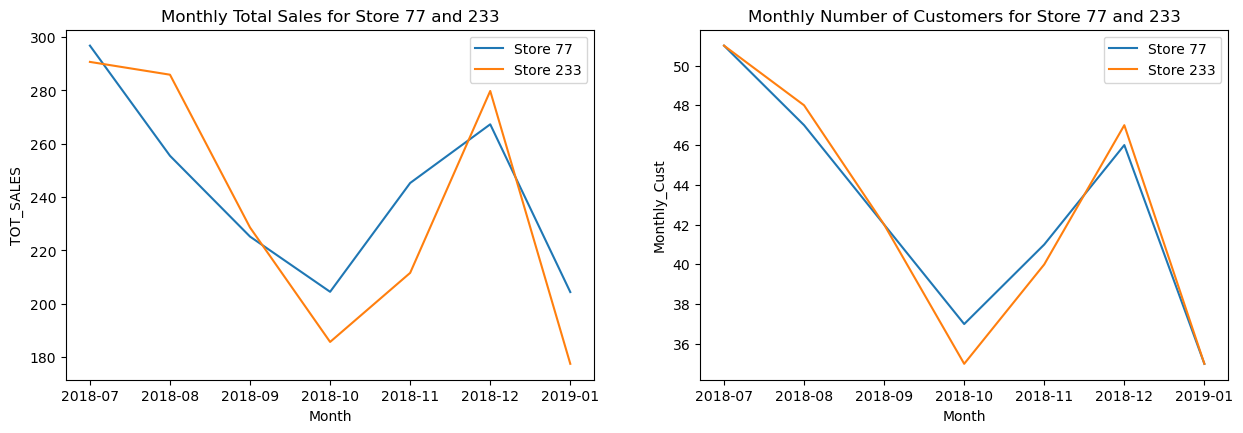

In [19]:
comp_graph(77,233)

Based on the metrics and the graphs above, store 233 seems to be a suitable control store for store 77.

In [20]:
control(86)

,STORE_NBR,TOT_SALES_DIFF,Magdist_Sales,Monthly_Cust_DIFF,Magdist_Cust,TOTAL_MAG_86,TOT_SALES_COR_86,Monthly_Cust_COR_86,TOTAL_COR_86,Rank
146,155,227.25,0.998964,10,1.000000,0.999482,0.877882,0.942876,0.910379,0.954930
101,109,221.25,1.000000,23,0.980333,0.990166,0.788300,0.770778,0.779539,0.884853
106,114,481.30,0.955087,44,0.948563,0.951825,0.734415,0.855339,0.794877,0.873351
129,138,458.05,0.959103,49,0.940998,0.950051,0.759864,0.749701,0.754782,0.852416
212,225,262.75,0.992833,23,0.980333,0.986583,0.617533,0.733791,0.675662,0.831122
...,...,...,...,...,...,...,...,...,...,...
100,108,4030.15,0.342170,451,0.332829,0.337500,-0.840413,-0.697245,-0.768829,-0.215665
48,52,5865.55,0.025181,657,0.021180,0.023180,-0.601629,-0.594459,-0.598044,-0.287432
111,120,5049.15,0.166180,431,0.363086,0.264633,-0.872693,-0.815097,-0.843895,-0.289631
39,42,5955.85,0.009585,658,0.019667,0.014626,-0.745720,-0.664952,-0.705336,-0.345355


Store 155 has the highest ranking for the trial store 86.

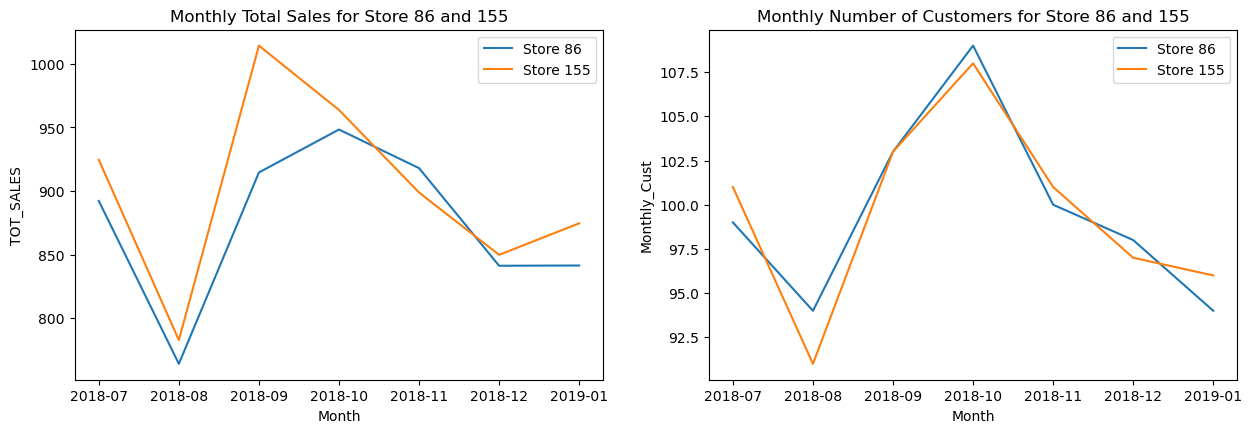

In [21]:
comp_graph(86,155)

Based on the metrics and the graphs above, store 155 seems to be a suitable control store for store 86.

In [22]:
control(88)

,STORE_NBR,TOT_SALES_DIFF,Magdist_Sales,Monthly_Cust_DIFF,Magdist_Cust,TOTAL_MAG_88,TOT_SALES_COR_88,Monthly_Cust_COR_88,TOTAL_COR_88,Rank
224,237,409.00,1.000000,11,1.000000,1.000000,0.308479,0.947326,0.627903,0.813951
169,178,2839.10,0.725911,155,0.829181,0.777546,0.731857,0.939466,0.835661,0.806604
65,69,2726.35,0.738628,113,0.879004,0.808816,0.450029,0.815792,0.632910,0.720863
105,113,2960.10,0.712264,187,0.791222,0.751743,0.495763,0.862632,0.679198,0.715470
191,201,1188.20,0.912115,69,0.931198,0.921656,0.492735,0.511302,0.502019,0.711837
...,...,...,...,...,...,...,...,...,...,...
83,90,7647.20,0.183609,589,0.314353,0.248981,-0.662427,-0.503735,-0.583081,-0.167050
244,258,9198.60,0.008628,853,0.001186,0.004907,0.087493,-0.825850,-0.369178,-0.182135
132,141,7466.10,0.204036,609,0.290629,0.247332,-0.690590,-0.547399,-0.618994,-0.185831
226,239,6978.40,0.259043,605,0.295374,0.277208,-0.642329,-0.660672,-0.651501,-0.187146


Store 237 has the highest ranking for the trial store 88.

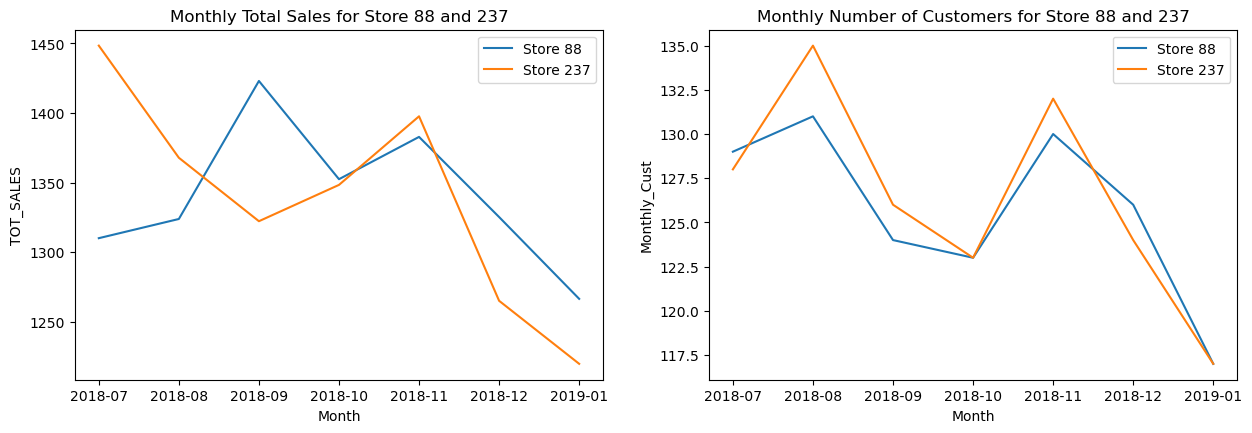

In [23]:
comp_graph(88,237)

---

Based on the metrics and the graphs above, store 237 seems to be a suitable control store for store 88 (similar monthly sales and number of customers level).

From the analysis above, store 233, 155 and 237 will be the control stores for the trial stores 77, 86 and 88 respectively. 

---

<h3 style="color: darkorange;">  3. Assess the control stores vs. trial stores during the trial period:</h3>

#### 3.1. Scaling factor

In [24]:
#calculating the scaling factor for each control store
scaling_77_233 = pretrial[pretrial['STORE_NBR']==77]['TOT_SALES'].sum()/pretrial[pretrial['STORE_NBR']==233]['TOT_SALES'].sum()
scaling_86_155 = pretrial[pretrial['STORE_NBR']==86]['TOT_SALES'].sum()/pretrial[pretrial['STORE_NBR']==155]['TOT_SALES'].sum()
scaling_88_237 = pretrial[pretrial['STORE_NBR']==88]['TOT_SALES'].sum()/pretrial[pretrial['STORE_NBR']==237]['TOT_SALES'].sum()

In [25]:
trial['Month'] = trial['DATE'].dt.to_period('M').astype(str)
trial

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight,Brand,Month
146284,2019-02-01,199,199296,198890,71,Twisties Cheese Burger 250g,2,8.6,250g,Twisties,2019-02
185727,2019-02-01,4,4160,3381,109,Pringles Barbeque 134g,2,7.4,134g,Pringles,2019-02
3526,2019-02-01,185,185456,188360,75,Cobs Popd Sea Salt Chips 110g,1,3.8,110g,Cobs,2019-02
174461,2019-02-01,50,50377,46523,107,Smiths Crinkle Cut French OnionDip 150g,2,5.2,150g,Smiths,2019-02
113747,2019-02-01,216,216014,214738,14,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.8,380g,Smiths,2019-02
...,...,...,...,...,...,...,...,...,...,...,...
71507,2019-04-30,45,45227,41685,26,Pringles Sweet&Spcy BBQ 134g,2,7.4,134g,Pringles,2019-04
194889,2019-04-30,133,133197,137306,91,CCs Tasty Cheese 175g,2,4.2,175g,CCs,2019-04
65396,2019-04-30,183,183232,186199,24,Grain Waves Sweet Chilli 210g,2,7.2,210g,GrnWves,2019-04
70073,2019-04-30,7,7282,7443,32,Kettle Sea Salt And Vinegar 175g,2,10.8,175g,Kettle,2019-04


#### 3.2. Total sales t-test

In [26]:
pair = [[77,233],[86,155],[88,237]]
control_store = [233,155,237]
trial_store = [77,86,88]

$H_0$: the total sales during the trial period for store 77 are equal to store 233

$H_1$: the total sales during the trial period for store 77 are not equal to store 233

In [27]:
trial_233 = trial[trial['STORE_NBR']==233]
trial_233 = trial[trial['STORE_NBR']==233].groupby('DATE')['TOT_SALES'].sum().reset_index()
trial_233['Scaled_233'] = trial_233['TOT_SALES']*scaling_77_233
trial_233

,DATE,TOT_SALES,Scaled_233
0,2019-02-01,10.4,10.645620
1,2019-02-02,6.0,6.141704
2,2019-02-03,5.6,5.732257
3,2019-02-04,4.4,4.503916
4,2019-02-05,2.9,2.968490
...,...,...,...
63,2019-04-23,5.9,6.039342
64,2019-04-24,6.0,6.141704
65,2019-04-25,3.0,3.070852
66,2019-04-28,5.4,5.527533


In [28]:
trial_77 = trial[trial['STORE_NBR']==77].groupby("DATE")['TOT_SALES'].sum().reset_index()
trial_77_233=pd.merge(trial_233[['DATE','Scaled_233']],trial_77,on='DATE', how='inner') #so no null value
trial_77_233 = trial_77_233.rename(columns = {'TOT_SALES':'TOT_SALES_77'})
trial_77_233['Per_Diff'] = (trial_77_233['TOT_SALES_77'] - trial_77_233['Scaled_233']) / (0.5 * (trial_77_233['Scaled_233'] + trial_77_233['TOT_SALES_77']))
trial_77_233.head()

,DATE,Scaled_233,TOT_SALES_77,Per_Diff
0,2019-02-01,10.645620,11.0,0.032744
1,2019-02-02,6.141704,8.4,0.310596
2,2019-02-03,5.732257,19.7,1.098427
3,2019-02-04,4.503916,2.3,-0.647838
4,2019-02-05,2.968490,13.4,1.274584


In [29]:
stats.ttest_ind(trial_77_233['Scaled_233'],trial_77_233['TOT_SALES_77'], equal_var = True)

TtestResult(statistic=-1.5270060931054836, pvalue=0.1295292956189956, df=114.0)

---

As the p-value is larger than 0.05, we can't reject the null hypothesis. It's concluded that the total sales of the trial store 77 and control store 233 are similar during the trial period.
___

$H_0$: the total sales during the trial period for store 86 are equal to store 155

$H_1$: the total sales during the trial period for store 86 are not equal to store 155

In [30]:
trial_155 = trial[trial['STORE_NBR']==155]
trial_155 = trial[trial['STORE_NBR']==155].groupby('DATE')['TOT_SALES'].sum().reset_index()
trial_155['Scaled_155'] = trial_155['TOT_SALES']*scaling_86_155
trial_155

,DATE,TOT_SALES,Scaled_155
0,2019-02-01,16.6,16.103081
1,2019-02-02,28.8,27.937876
2,2019-02-03,77.8,75.471069
3,2019-02-04,24.0,23.281564
4,2019-02-05,24.0,23.281564
...,...,...,...
83,2019-04-26,30.0,29.101954
84,2019-04-27,25.8,25.027681
85,2019-04-28,5.2,5.044339
86,2019-04-29,19.6,19.013277


In [31]:
trial_86 = trial[trial['STORE_NBR']==86].groupby("DATE")['TOT_SALES'].sum().reset_index()
trial_86_155=pd.merge(trial_155[['DATE','Scaled_155']],trial_86,on='DATE', how='inner') 
trial_86_155 = trial_86_155.rename(columns = {'TOT_SALES':'TOT_SALES_86'})
trial_86_155['Per_Diff'] = (trial_86_155['TOT_SALES_86'] - trial_86_155['Scaled_155']) / (0.5 * (trial_86_155['Scaled_155'] + trial_86_155['TOT_SALES_86']))
trial_86_155

,DATE,Scaled_155,TOT_SALES_86,Per_Diff
0,2019-02-01,16.103081,18.6,0.143902
1,2019-02-02,27.937876,22.6,-0.211243
2,2019-02-03,75.471069,54.2,-0.328077
3,2019-02-04,23.281564,18.4,-0.234231
4,2019-02-05,23.281564,27.0,0.147905
...,...,...,...,...
82,2019-04-25,32.012150,38.0,0.171052
83,2019-04-26,29.101954,23.0,-0.234231
84,2019-04-28,5.044339,63.6,1.706059
85,2019-04-29,19.013277,44.2,0.796881


In [32]:
stats.ttest_ind(trial_86_155['Scaled_155'],trial_86_155['TOT_SALES_86'], equal_var = True)

TtestResult(statistic=-1.5851388461756235, pvalue=0.11477161914612269, df=172.0)

---

As the p-value is larger than 0.05, we can't reject the null hypothesis. It's concluded that the total sales of the trial store 86 and control store 155 are similar during the trial period.
___

$H_0$: the total sales during the trial period for store 88 are equal to store 237

$H_1$: the total sales during the trial period for store 88 are not equal to store 237

In [33]:
trial_237 = trial[trial['STORE_NBR']==237]
trial_237 = trial[trial['STORE_NBR']==237].groupby('DATE')['TOT_SALES'].sum().reset_index()
trial_237['Scaled_237'] = trial_237['TOT_SALES']*scaling_88_237
trial_237

,DATE,TOT_SALES,Scaled_237
0,2019-02-01,30.4,30.447373
1,2019-02-02,60.8,60.894747
2,2019-02-03,37.6,37.658593
3,2019-02-04,43.8,43.868255
4,2019-02-05,25.4,25.439582
...,...,...,...
84,2019-04-26,20.6,20.632102
85,2019-04-27,51.8,51.880722
86,2019-04-28,75.4,75.517498
87,2019-04-29,74.2,74.315628


In [34]:
trial_88 = trial[trial['STORE_NBR']==88].groupby("DATE")['TOT_SALES'].sum().reset_index()
trial_88_237=pd.merge(trial_237[['DATE','Scaled_237']],trial_88,on='DATE', how='inner') 
trial_88_237 = trial_88_237.rename(columns = {'TOT_SALES':'TOT_SALES_88'})
trial_88_237['Per_Diff'] = (trial_88_237['TOT_SALES_88'] - trial_88_237['Scaled_237']) / (0.5 * (trial_88_237['Scaled_237'] + trial_88_237['TOT_SALES_88']))
trial_88_237

,DATE,Scaled_237,TOT_SALES_88,Per_Diff
0,2019-02-01,30.447373,54.0,0.557806
1,2019-02-02,60.894747,69.8,0.136276
2,2019-02-03,37.658593,104.0,0.936638
3,2019-02-04,43.868255,30.0,-0.375486
4,2019-02-05,25.439582,65.8,0.884713
...,...,...,...,...
83,2019-04-26,20.632102,95.4,1.288745
84,2019-04-27,51.880722,40.2,-0.253706
85,2019-04-28,75.517498,52.8,-0.354083
86,2019-04-29,74.315628,29.0,-0.877227


In [35]:
stats.ttest_ind(trial_88_237['Scaled_237'],trial_88_237['TOT_SALES_88'], equal_var = True)

TtestResult(statistic=-1.8467711978443608, pvalue=0.06647871787768538, df=174.0)

---

As the p-value is larger than 0.05, we can't reject the null hypothesis. It's concluded that the total sales of the trial store 88 and control store 237 are similar during the trial period.

---

#### 3.3. Total sales percentage difference t-test

$H_0$: The percentage difference between the control store 233 and trial store 77 pre-trial and during trial are equal

$H_1$: The percentage difference between the control store 233 and trial store pre-trial 77 and during trial are not equal

In [36]:
pre_77 = before[before['STORE_NBR']==77].groupby('DATE')['TOT_SALES'].sum().reset_index()
pre_233 = before[before['STORE_NBR']==233].groupby('DATE')['TOT_SALES'].sum().reset_index()
pre_233['Scaled_233']= pre_233['TOT_SALES']*scaling_77_233
pre_77_233 = pd.merge(pre_77[['DATE','TOT_SALES']],pre_233[['DATE','Scaled_233']], on='DATE',how='inner')
pre_77_233=pre_77_233.rename(columns={'TOT_SALES':'TOT_SALES_77'})
pre_77_233['Per_Diff']=(pre_77_233['TOT_SALES_77']-pre_77_233['Scaled_233'])/(0.5*(pre_77_233['Scaled_233']+pre_77_233['TOT_SALES_77']))
pre_77_233

,DATE,TOT_SALES_77,Scaled_233,Per_Diff
0,2018-07-01,15.6,6.755874,0.791213
1,2018-07-03,2.6,15.866068,-1.436805
2,2018-07-05,12.1,13.102301,-0.079540
3,2018-07-06,3.7,5.936980,-0.464249
4,2018-07-07,20.7,9.007832,0.787144
...,...,...,...,...
120,2019-01-21,15.2,15.149536,0.003326
121,2019-01-23,17.9,6.346427,0.953012
122,2019-01-24,1.7,16.275515,-1.621708
123,2019-01-26,6.0,6.141704,-0.023342


In [37]:
stats.ttest_ind(trial_77_233['Per_Diff'],pre_77_233['Per_Diff'], equal_var = True)

TtestResult(statistic=1.774729336910583, pvalue=0.07762344063280324, df=181.0)

---

As the p-value is larger than 0.05, we can't reject the null hypothesis. It's concluded that the percentage difference in total sales of the trial store 77 and control store 233 during the pre-trial period and trial period are similar.
___

$H_0$: The percentage difference between the control store 155 and trial store 86 pre-trial and during trial are equal

$H_1$: The percentage difference between the control store 155 and trial store pre-trial 86 and during trial are not equal

In [38]:
pre_86 = before[before['STORE_NBR']==86].groupby('DATE')['TOT_SALES'].sum().reset_index()
pre_155 = before[before['STORE_NBR']==155].groupby('DATE')['TOT_SALES'].sum().reset_index()
pre_155['Scaled_155']= pre_155['TOT_SALES']*scaling_86_155
pre_86_155 = pd.merge(pre_86[['DATE','TOT_SALES']],pre_155[['DATE','Scaled_155']], on='DATE',how='inner')
pre_86_155=pre_86_155.rename(columns={'TOT_SALES':'TOT_SALES_86'})
pre_86_155['Per_Diff']=(pre_86_155['TOT_SALES_86']-pre_86_155['Scaled_155'])/(0.5*(pre_86_155['Scaled_155']+pre_86_155['TOT_SALES_86']))
pre_86_155

,DATE,TOT_SALES_86,Scaled_155,Per_Diff
0,2018-07-01,37.8,11.058743,1.094636
1,2018-07-02,38.0,65.382391,-0.529730
2,2018-07-03,49.4,15.715055,1.034628
3,2018-07-04,14.8,47.145166,-1.044316
4,2018-07-05,9.8,15.909068,-0.475246
...,...,...,...,...
203,2019-01-27,27.2,43.846945,-0.468618
204,2019-01-28,42.0,5.238352,1.556432
205,2019-01-29,19.8,27.161824,-0.313524
206,2019-01-30,8.2,36.086424,-1.259367


In [39]:
stats.ttest_ind(trial_86_155['Per_Diff'],pre_86_155['Per_Diff'], equal_var = True)

TtestResult(statistic=1.8992308703876764, pvalue=0.058516162455743176, df=293.0)

---

As the p-value is larger than 0.05, we can't reject the null hypothesis. It's concluded that the percentage difference in total sales of the trial store 86 and control store 155 during the pre-trial period and trial period are similar.
___

$H_0$: The percentage difference between the control store 237 and trial store 88 pre-trial and during trial are equal

$H_1$: The percentage difference between the control store 237 and trial store pre-trial 88 and during trial are not equal

In [40]:
pre_88 = before[before['STORE_NBR']==88].groupby('DATE')['TOT_SALES'].sum().reset_index()
pre_237 = before[before['STORE_NBR']==237].groupby('DATE')['TOT_SALES'].sum().reset_index()
pre_237['Scaled_237']= pre_237['TOT_SALES']*scaling_88_237
pre_88_237 = pd.merge(pre_88[['DATE','TOT_SALES']],pre_237[['DATE','Scaled_237']], on='DATE',how='inner')
pre_88_237=pre_88_237.rename(columns={'TOT_SALES':'TOT_SALES_88'})
pre_88_237['Per_Diff']=(pre_88_237['TOT_SALES_88']-pre_88_237['Scaled_237'])/(0.5*(pre_88_237['Scaled_237']+pre_88_237['TOT_SALES_88']))
pre_88_237

,DATE,TOT_SALES_88,Scaled_237,Per_Diff
0,2018-07-01,46.6,36.857347,0.233476
1,2018-07-02,51.0,18.428673,0.938267
2,2018-07-03,32.8,52.281345,-0.457946
3,2018-07-04,17.4,63.498798,-1.139666
4,2018-07-05,28.8,49.276670,-0.524527
...,...,...,...,...
207,2019-01-27,23.4,37.257970,-0.456922
208,2019-01-28,52.6,65.702226,-0.221504
209,2019-01-29,48.8,30.647685,0.456963
210,2019-01-30,39.6,27.843322,0.348639


In [41]:
trial_88_237

,DATE,Scaled_237,TOT_SALES_88,Per_Diff
0,2019-02-01,30.447373,54.0,0.557806
1,2019-02-02,60.894747,69.8,0.136276
2,2019-02-03,37.658593,104.0,0.936638
3,2019-02-04,43.868255,30.0,-0.375486
4,2019-02-05,25.439582,65.8,0.884713
...,...,...,...,...
83,2019-04-26,20.632102,95.4,1.288745
84,2019-04-27,51.880722,40.2,-0.253706
85,2019-04-28,75.517498,52.8,-0.354083
86,2019-04-29,74.315628,29.0,-0.877227


In [42]:
stats.ttest_ind(trial_88_237['Per_Diff'],pre_88_237['Per_Diff'], equal_var = True)

TtestResult(statistic=1.6779571675112601, pvalue=0.09440384957750073, df=298.0)

---

As the p-value is larger than 0.05, we can't reject the null hypothesis. It's concluded that the percentage difference in total sales of the trial store 88 and control store 237 during the pre-trial period and trial period are similar.


---

In [43]:
scale = [scaling_77_233,scaling_86_155,scaling_88_237]
scale

[1.023617303289553, 0.9700651481287743, 1.001558330664959]

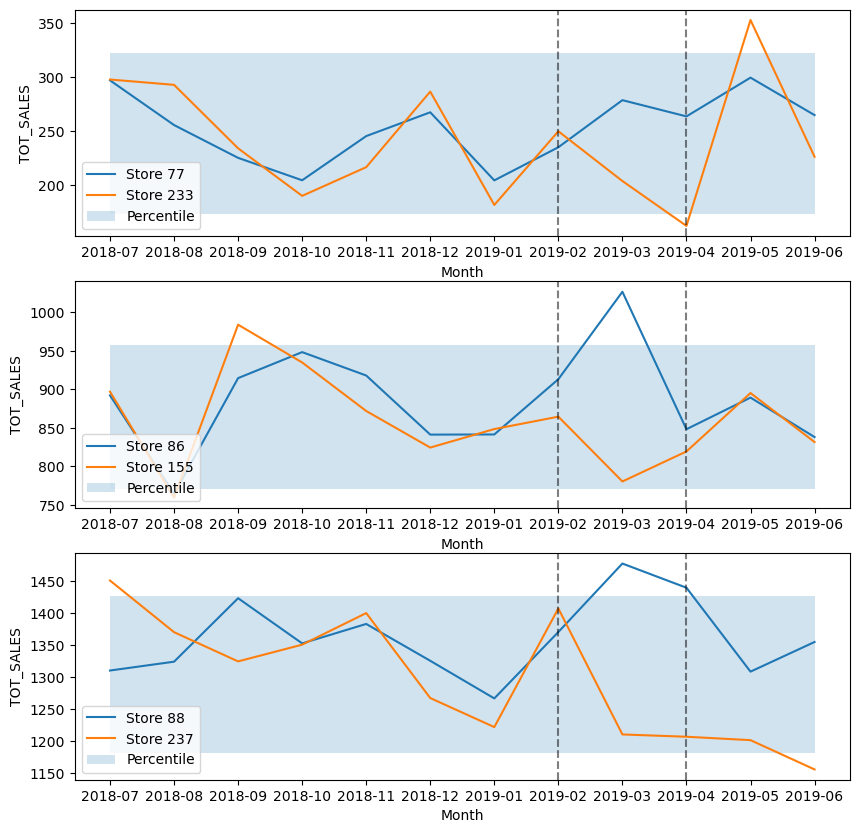

In [44]:
fig = plt.figure(figsize=(10,10))
for i in range(3):
    tstore = transaction[(transaction['STORE_NBR']==pair[i][0])].groupby('Month')['TOT_SALES'].sum().reset_index()
    cstore = transaction[(transaction['STORE_NBR']==pair[i][1])].groupby('Month')['TOT_SALES'].sum().reset_index()
    cstore['Scaled'] = cstore['TOT_SALES']*scale[i]
    
    percentile = np.percentile(cstore['Scaled'],[5, 95])
    
    ax = fig.add_subplot(3,1,i+1)
    sns.lineplot(x=tstore['Month'], y=tstore['TOT_SALES'],label='Store {}'.format(pair[i][0]))
    sns.lineplot(x=cstore['Month'], y=cstore['Scaled'], label='Store {}'.format(pair[i][1]))
    plt.fill_between(cstore['Month'], percentile[0], percentile[1],alpha = 0.2,label='Percentile')

    plt.axvline(x = '2019-02', color='black', linestyle ="--", alpha=0.5)
    plt.axvline(x = '2019-04', color='black', linestyle ="--", alpha=0.5)
    plt.legend(loc='lower left')

In [96]:
import pandas as pd
import numpy as np

table = pd.DataFrame()
percen = []

i = 2

    
tstore = transaction[(transaction['STORE_NBR'] == pair[i][0])].groupby('Month')['TOT_SALES'].sum().reset_index()
cstore = transaction[(transaction['STORE_NBR'] == pair[i][1])].groupby('Month')['TOT_SALES'].sum().reset_index()
cstore['Scaled'] = cstore['TOT_SALES'] * scale[i]
    
merged = pd.merge(tstore, cstore[['Month', 'Scaled']], on='Month', how='outer', suffixes=('_TSTORE', '_CSTORE'))
    

percentile = np.percentile(cstore['Scaled'], [5, 95])
percen.append(percentile)
    
    
table = pd.concat([table, merged], ignore_index=True)


In [98]:
table.to_csv("88_237.csv")

In [82]:
pair

[[77, 233], [86, 155], [88, 237]]

In [81]:
percen

[array([172.98620617, 322.3012622 ]),
 array([770.84771898, 957.03717319]),
 array([1180.5718589 , 1426.63971737])]

---

**Conclusion**: From the t-test for all three trial stores, we can't reject the null hypothesis, hence the total sales of the trial stores are not significantly different from the control stores. However, from the percentile graph, we can see that in March 2019, trial store 86 and 88 have total sales exceed the percentile. It's also important to note that for all trial stores, the sales in March 2019 is the highest during the 3-months trial period (sales increase in the 2nd trial month then decrease in the 3rd). This might be due to a special promotion by one of the chips brand or due to seasonality. Further investigation on sales during this month can help understand the surge. 

---

#### 3.4. Number of customer t-test

In [99]:
def num_customer_trial(store):
    num_customer = trial[trial['STORE_NBR']==store].groupby('DATE')['LYLTY_CARD_NBR'].count().reset_index()
    num_customer['Store'] = store
    num_customer = num_customer.rename(columns={'LYLTY_CARD_NBR':'LYLTY_CARD_NBR_{}'.format(store)})
    return num_customer

def num_customer_pretrial(store):
    num_customer = before[before['STORE_NBR']==store].groupby('DATE')['LYLTY_CARD_NBR'].count().reset_index()
    num_customer['Store'] = store
    num_customer = num_customer.rename(columns={'LYLTY_CARD_NBR':'LYLTY_CARD_NBR_{}'.format(store)})
    return num_customer

In [100]:
nc_trial_77_233 = pd.merge(num_customer_trial(77),num_customer_trial(233), on='DATE')
nc_trial_77_233['Diff'] = nc_trial_77_233['LYLTY_CARD_NBR_77']-nc_trial_77_233['LYLTY_CARD_NBR_233']
nc_trial_77_233.head()

,DATE,LYLTY_CARD_NBR_77,Store_x,LYLTY_CARD_NBR_233,Store_y,Diff
0,2019-02-01,2,77,2,233,0
1,2019-02-02,2,77,1,233,1
2,2019-02-03,4,77,1,233,3
3,2019-02-04,1,77,1,233,0
4,2019-02-05,2,77,1,233,1


In [101]:
nc_pretrial_77_233 = pd.merge(num_customer_pretrial(77),num_customer_pretrial(233), on='DATE')
nc_pretrial_77_233['Diff'] = nc_pretrial_77_233['LYLTY_CARD_NBR_77']-nc_pretrial_77_233['LYLTY_CARD_NBR_233']
nc_pretrial_77_233.head()

,DATE,LYLTY_CARD_NBR_77,Store_x,LYLTY_CARD_NBR_233,Store_y,Diff
0,2018-07-01,2,77,1,233,1
1,2018-07-03,1,77,2,233,-1
2,2018-07-05,4,77,2,233,2
3,2018-07-06,1,77,2,233,-1
4,2018-07-07,4,77,1,233,3


$H_0$: The percentage difference between the number of customer of the control store 233 and trial store 77 pre-trial and during trial are equal

$H_1$: The percentage difference between the number of customer of the control store 233 and trial store pre-trial 77 and during trial are not equal

In [102]:
stats.ttest_ind(nc_trial_77_233['Diff'],nc_pretrial_77_233['Diff'], equal_var = True)

TtestResult(statistic=0.995688403203271, pvalue=0.32073081004444604, df=181.0)

---

As the p-value is larger than 0.05, we can't reject the null hypothesis. It's concluded that the percentage difference of the number of customer of the trial store 77 and control store 233 during the pre-trial period and trial period are similar.

---

In [103]:
nc_trial_86_155 = pd.merge(num_customer_trial(86),num_customer_trial(155), on='DATE')
nc_trial_86_155['Diff'] = nc_trial_86_155['LYLTY_CARD_NBR_86']-nc_trial_86_155['LYLTY_CARD_NBR_155']
nc_trial_86_155.head()

,DATE,LYLTY_CARD_NBR_86,Store_x,LYLTY_CARD_NBR_155,Store_y,Diff
0,2019-02-01,3,86,3,155,0
1,2019-02-02,3,86,5,155,-2
2,2019-02-03,8,86,12,155,-4
3,2019-02-04,2,86,3,155,-1
4,2019-02-05,4,86,4,155,0


In [104]:
nc_pretrial_86_155 = pd.merge(num_customer_pretrial(86),num_customer_pretrial(155), on='DATE')
nc_pretrial_86_155['Diff'] = nc_pretrial_86_155['LYLTY_CARD_NBR_86']-nc_pretrial_86_155['LYLTY_CARD_NBR_155']
nc_pretrial_86_155.head()

,DATE,LYLTY_CARD_NBR_86,Store_x,LYLTY_CARD_NBR_155,Store_y,Diff
0,2018-07-01,5,86,2,155,3
1,2018-07-02,4,86,9,155,-5
2,2018-07-03,6,86,2,155,4
3,2018-07-04,2,86,7,155,-5
4,2018-07-05,2,86,3,155,-1


$H_0$: The percentage difference between the number of customer of the control store 155 and trial store 86 pre-trial and during trial are equal

$H_1$: The percentage difference between the number of customer of the control store 155 and trial store pre-trial 86 and during trial are not equal

In [105]:
stats.ttest_ind(nc_trial_86_155['Diff'],nc_pretrial_86_155['Diff'], equal_var = True)

TtestResult(statistic=1.711786860210354, pvalue=0.08799411551273706, df=293.0)

---

As the p-value is larger than 0.05, we can't reject the null hypothesis. It's concluded that the percentage difference of the number of customer of the trial store 86 and control store 155 during the pre-trial period and trial period are similar.

---

In [106]:
nc_trial_88_237 = pd.merge(num_customer_trial(88),num_customer_trial(237), on='DATE')
nc_trial_88_237['Diff'] = nc_trial_88_237['LYLTY_CARD_NBR_88']-nc_trial_88_237['LYLTY_CARD_NBR_237']
nc_trial_88_237.head()

,DATE,LYLTY_CARD_NBR_88,Store_x,LYLTY_CARD_NBR_237,Store_y,Diff
0,2019-02-01,6,88,3,237,3
1,2019-02-02,8,88,6,237,2
2,2019-02-03,11,88,4,237,7
3,2019-02-04,4,88,5,237,-1
4,2019-02-05,7,88,3,237,4


In [107]:
nc_pretrial_88_237 = pd.merge(num_customer_pretrial(88),num_customer_pretrial(237), on='DATE')
nc_pretrial_88_237['Diff'] = nc_pretrial_88_237['LYLTY_CARD_NBR_88']-nc_pretrial_88_237['LYLTY_CARD_NBR_237']
nc_pretrial_88_237.head()

,DATE,LYLTY_CARD_NBR_88,Store_x,LYLTY_CARD_NBR_237,Store_y,Diff
0,2018-07-01,6,88,4,237,2
1,2018-07-02,5,88,2,237,3
2,2018-07-03,4,88,5,237,-1
3,2018-07-04,2,88,7,237,-5
4,2018-07-05,3,88,6,237,-3


$H_0$: The percentage difference between the number of customer of the control store 237 and trial store 88 pre-trial and during trial are equal

$H_1$: The percentage difference between the number of customer of the control store 237 and trial store pre-trial 88 and during trial are not equal

In [108]:
stats.ttest_ind(nc_trial_88_237['Diff'],nc_pretrial_88_237['Diff'], equal_var = True)

TtestResult(statistic=1.6743168407470215, pvalue=0.09511748365666198, df=298.0)

---

As the p-value is larger than 0.05, we can't reject the null hypothesis. It's concluded that the percentage difference of the number of customer of the trial store 88 and control store 237 during the pre-trial period and trial period are similar.

**Conclusion**: From the t-test, we cannot conclude that the number of customer during the trial period increases. Therefore, the overall total sales and number of customers pretrial and during trial for all three trials stores do not different significantly from the pretrial period.

---

<h3 style="color: darkorange;">  4. Further analysis:</h3>

As mentioned before, the sales during March 2019 for all 3 trial stores significantly higher so I will investigate further.

I will look at the number of customers and the purchase quantity per customer.

In [109]:
store_77_furtherana = trial[trial['STORE_NBR']==77][['DATE','LYLTY_CARD_NBR','PROD_QTY','TOT_SALES']]
store_77_furtherana

,DATE,LYLTY_CARD_NBR,PROD_QTY,TOT_SALES
231363,2019-02-01,77263,2,7.6
30941,2019-02-01,77402,2,3.4
104943,2019-02-02,77344,1,3.0
244478,2019-02-02,77287,2,5.4
260454,2019-02-03,77120,2,6.6
...,...,...,...,...
38841,2019-04-25,77137,1,2.1
140025,2019-04-26,77251,1,3.0
140043,2019-04-27,77406,2,6.0
104954,2019-04-28,77480,2,5.4


In [110]:
store_77_numcust = store_77_furtherana.groupby('DATE')['LYLTY_CARD_NBR'].count().reset_index()

<Axes: xlabel='DATE', ylabel='LYLTY_CARD_NBR'>

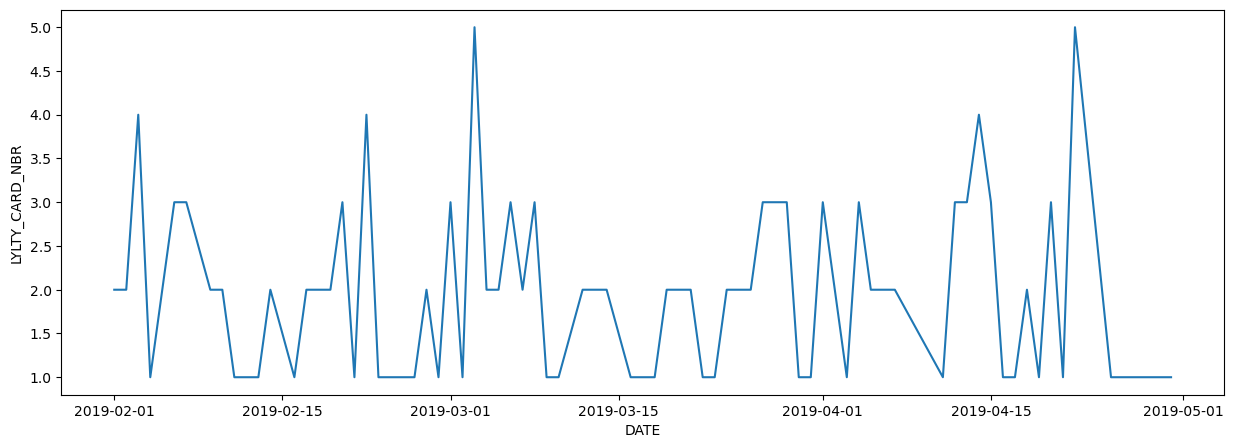

In [111]:
plt.figure(figsize=(15,5))
sns.lineplot(y='LYLTY_CARD_NBR',x='DATE',data = store_77_numcust)

In [112]:
store_77_numcust['LYLTY_CARD_NBR'].mean().round(2)

1.95

In [113]:
store_77_numcust.sort_values(by='LYLTY_CARD_NBR',ascending = False)

,DATE,LYLTY_CARD_NBR
70,2019-04-22,5
26,2019-03-03,5
2,2019-02-03,4
18,2019-02-22,4
62,2019-04-14,4
...,...,...
39,2019-03-18,1
43,2019-03-22,1
44,2019-03-23,1
50,2019-03-30,1


In [114]:
store_77_qty = store_77_furtherana.groupby('DATE')['PROD_QTY'].sum().reset_index()

<Axes: xlabel='DATE', ylabel='PROD_QTY'>

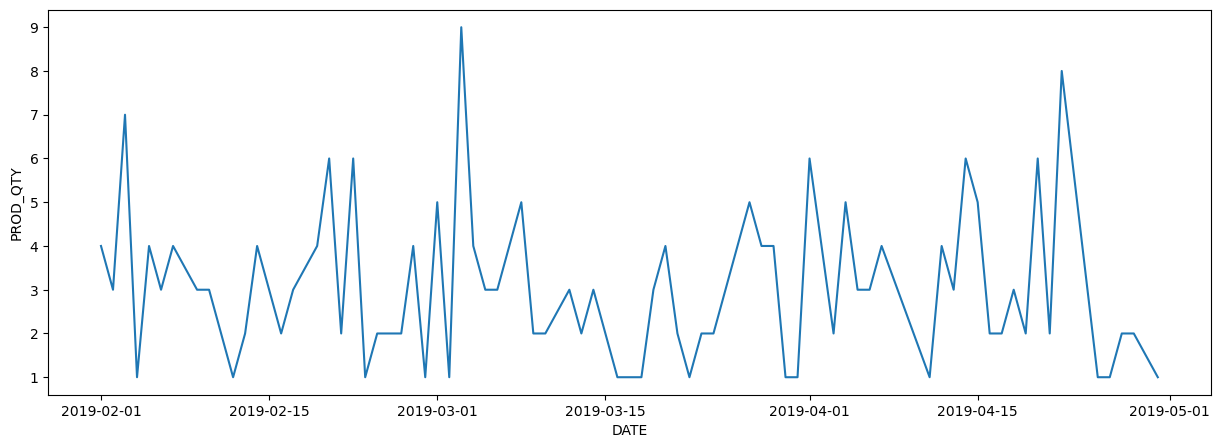

In [115]:
plt.figure(figsize=(15,5))
sns.lineplot(y='PROD_QTY',x='DATE',data = store_77_qty)

In [116]:
store_77_qty['PROD_QTY'].mean().round(2)

3.08

In [117]:
store_77_qty.sort_values(by='PROD_QTY', ascending = False)

,DATE,PROD_QTY
26,2019-03-03,9
70,2019-04-22,8
2,2019-02-03,7
62,2019-04-14,6
16,2019-02-20,6
...,...,...
23,2019-02-28,1
19,2019-02-23,1
10,2019-02-12,1
3,2019-02-04,1


---

There's a surge in the number of customer and sold quantity on the 3rd of March. 

---

In [118]:
store_86_furtherana = trial[trial['STORE_NBR']==86][['DATE','LYLTY_CARD_NBR','PROD_QTY','TOT_SALES']]

In [119]:
store_86_numcust = store_86_furtherana.groupby('DATE')['LYLTY_CARD_NBR'].count().reset_index()

<Axes: xlabel='DATE', ylabel='LYLTY_CARD_NBR'>

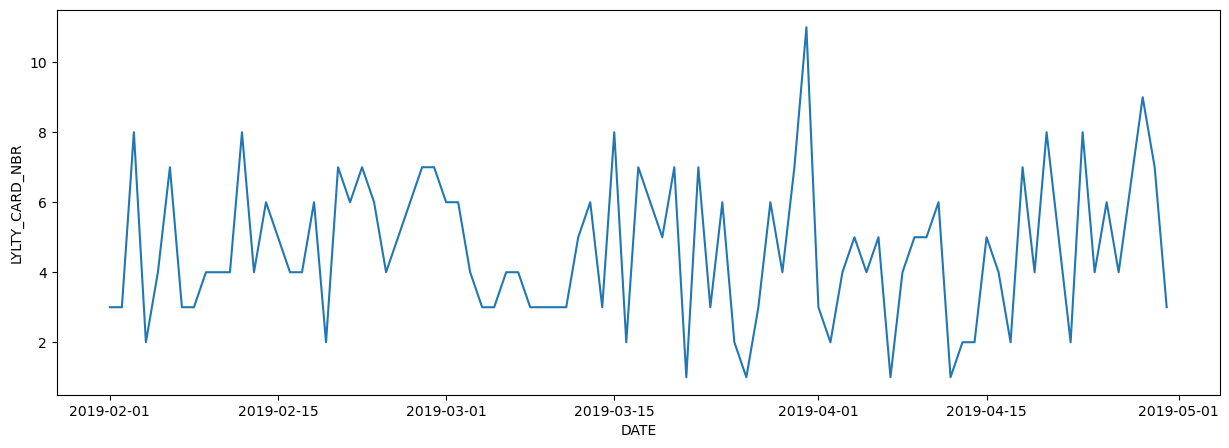

In [120]:
plt.figure(figsize=(15,5))
sns.lineplot(y='LYLTY_CARD_NBR',x='DATE',data = store_86_numcust)

In [121]:
store_86_numcust['LYLTY_CARD_NBR'].mean().round(2)

4.64

In [122]:
store_86_numcust.sort_values(by='LYLTY_CARD_NBR',ascending = False)

,DATE,LYLTY_CARD_NBR
58,2019-03-31,11
85,2019-04-28,9
78,2019-04-20,8
2,2019-02-03,8
42,2019-03-15,8
...,...,...
60,2019-04-02,2
70,2019-04-12,1
48,2019-03-21,1
65,2019-04-07,1


In [123]:
store_86_qty = store_86_furtherana.groupby('DATE')['PROD_QTY'].sum().reset_index()

<Axes: xlabel='DATE', ylabel='PROD_QTY'>

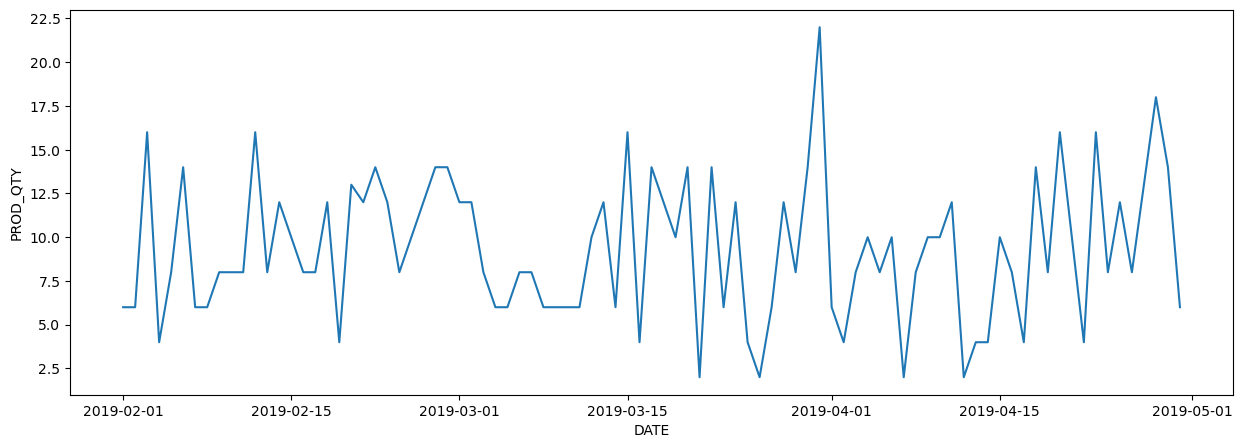

In [124]:
plt.figure(figsize=(15,5))
sns.lineplot(y='PROD_QTY',x='DATE',data = store_86_qty)

In [125]:
store_86_qty['PROD_QTY'].mean().round(2)

9.26

In [126]:
store_86_qty.sort_values(by='PROD_QTY',ascending = False)

,DATE,PROD_QTY
58,2019-03-31,22
85,2019-04-28,18
78,2019-04-20,16
2,2019-02-03,16
42,2019-03-15,16
...,...,...
60,2019-04-02,4
70,2019-04-12,2
48,2019-03-21,2
65,2019-04-07,2


---

The number of customers and sold quantities increased on the 2019-03-31.

---

In [145]:
store_88_furtherana = trial[trial['STORE_NBR']==88][['DATE','LYLTY_CARD_NBR','PROD_QTY','TOT_SALES']]

<Axes: xlabel='DATE', ylabel='LYLTY_CARD_NBR'>

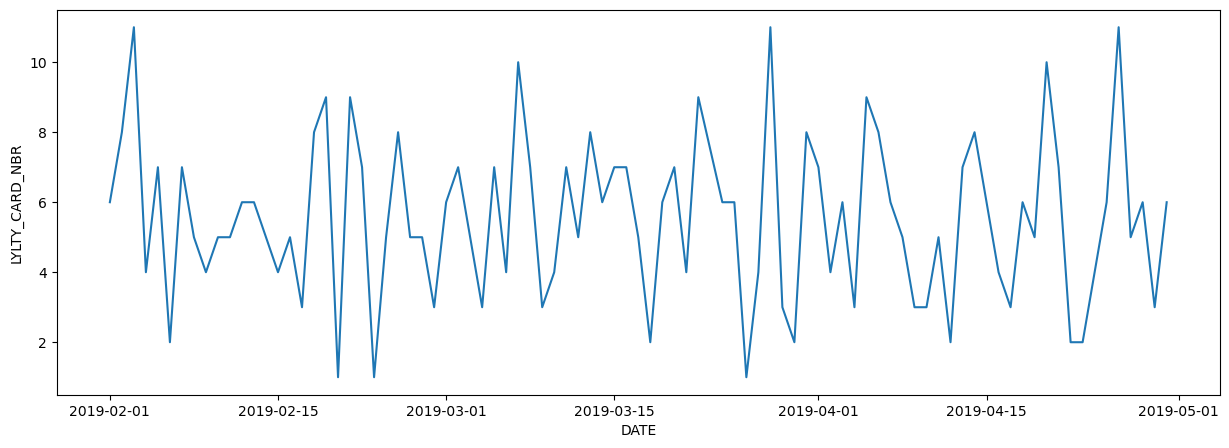

In [146]:
store_88_numcust = store_88_furtherana.groupby('DATE')['LYLTY_CARD_NBR'].count().reset_index()
plt.figure(figsize=(15,5))
sns.lineplot(y='LYLTY_CARD_NBR',x='DATE',data = store_88_numcust)

In [147]:
store_88_numcust['LYLTY_CARD_NBR'].mean().round(2)

5.52

In [148]:
store_88_numcust.sort_values(by='LYLTY_CARD_NBR',ascending = False)

,DATE,LYLTY_CARD_NBR
2,2019-02-03,11
54,2019-03-28,11
83,2019-04-26,11
34,2019-03-07,10
77,2019-04-20,10
...,...,...
69,2019-04-12,2
56,2019-03-30,2
19,2019-02-20,1
22,2019-02-23,1


<Axes: xlabel='DATE', ylabel='PROD_QTY'>

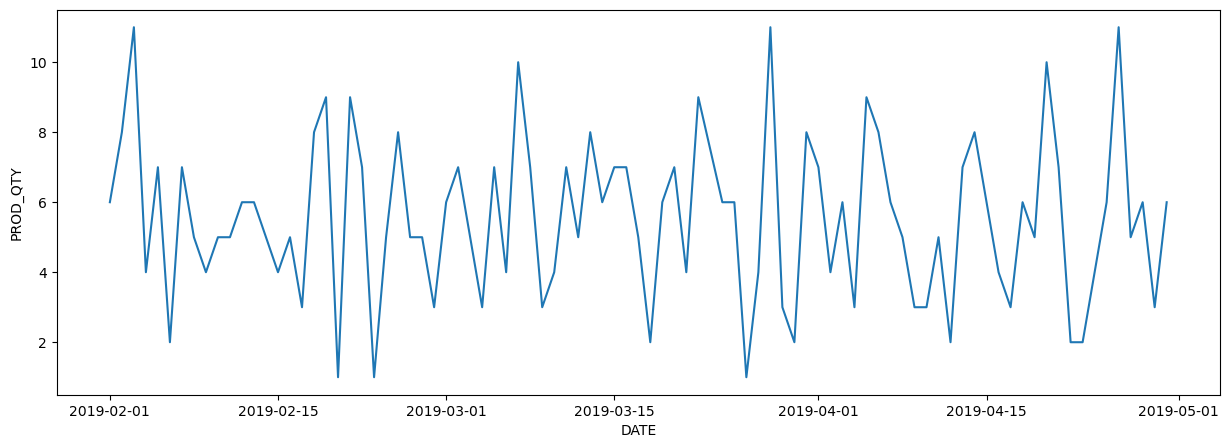

In [149]:
store_88_qty = store_88_furtherana.groupby('DATE')['PROD_QTY'].count().reset_index()
plt.figure(figsize=(15,5))
sns.lineplot(y='PROD_QTY',x='DATE',data = store_88_qty)

In [150]:
store_88_qty['PROD_QTY'].mean().round(2)

5.52

In [151]:
store_88_qty.sort_values(by='PROD_QTY',ascending = False)

,DATE,PROD_QTY
2,2019-02-03,11
54,2019-03-28,11
83,2019-04-26,11
34,2019-03-07,10
77,2019-04-20,10
...,...,...
69,2019-04-12,2
56,2019-03-30,2
19,2019-02-20,1
22,2019-02-23,1


---

Similar to store 77 and store 86, there's a day in March (2019-03-28) that store 88 has higher number of customers and sold quantity than the other days.

---

**Conclusion**: the high total sales in March is due to having more customers on one specific date in the month (which leads to higher sold quantity). This might be due to external factors as the sales does not sustain throughout the month. Further qualitative analysis can be done to explore whether there's any event close by the stores on those date which might lead to a surge in sales.



<h3 style="color: darkorange;">  5. Conclusion:</h3>

From the t-test (comparing the trial stores and the control stores), we cannot reject the hypothesis that the total sales and number of customes during the trial period is significantly different from the pretrial period (at 5% confidence interval). However, in March, all three stores have an increase in total sales due to an increase of the number of customer on a day, this increment seems to be a one of event.